# **Import and preprocess the dataset**

In [1]:
!pip install -q opendatasets

## Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import opendatasets as od

## Download data from Kaggle

In [3]:
od.download_kaggle_dataset(dataset_url='https://www.kaggle.com/datasets/harishkumardatalab/housing-price-prediction', data_dir='housing_price_prediction')

csv_file_path = "/content/housing_price_prediction/housing-price-prediction/Housing.csv"
df = pd.read_csv(csv_file_path)

df.head()

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: joisesarakkal
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/harishkumardatalab/housing-price-prediction


100%|██████████| 4.63k/4.63k [00:00<00:00, 11.6MB/s]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Encode categorical variables

In [4]:
df['mainroad'] = df['mainroad'].map({'yes': 1, 'no': 0})
df['guestroom'] = df['guestroom'].map({'yes': 1, 'no': 0})
df['basement'] = df['basement'].map({'yes': 1, 'no': 0})
df['hotwaterheating'] = df['hotwaterheating'].map({'yes': 1, 'no': 0})
df['airconditioning'] = df['airconditioning'].map({'yes': 1, 'no': 0})
df['prefarea'] = df['prefarea'].map({'yes': 1, 'no': 0})
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

## Define features and target

In [5]:
X = df.drop('price', axis=1)
y = df['price']

# **Split data into train-test sets**

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Fit a Linear Regression model**

In [8]:
# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Predict

In [9]:
y_pred = model.predict(X_test)

# **Evaluate model using MAE, MSE, R²**

In [10]:
# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 970043.4039201637
Mean Squared Error (MSE): 1754318687330.6633
R² Score: 0.6529242642153185


# **Plot regression line and interpret coefficients**

## Coefficients

In [11]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\nFeature Coefficients:")
print(coeff_df)


Feature Coefficients:
                                  Coefficient
area                             2.359688e+02
bedrooms                         7.677870e+04
bathrooms                        1.094445e+06
stories                          4.074766e+05
mainroad                         3.679199e+05
guestroom                        2.316100e+05
basement                         3.902512e+05
hotwaterheating                  6.846499e+05
airconditioning                  7.914267e+05
parking                          2.248419e+05
prefarea                         6.298906e+05
furnishingstatus_semi-furnished -1.268818e+05
furnishingstatus_unfurnished    -4.136451e+05


## Plot regression line

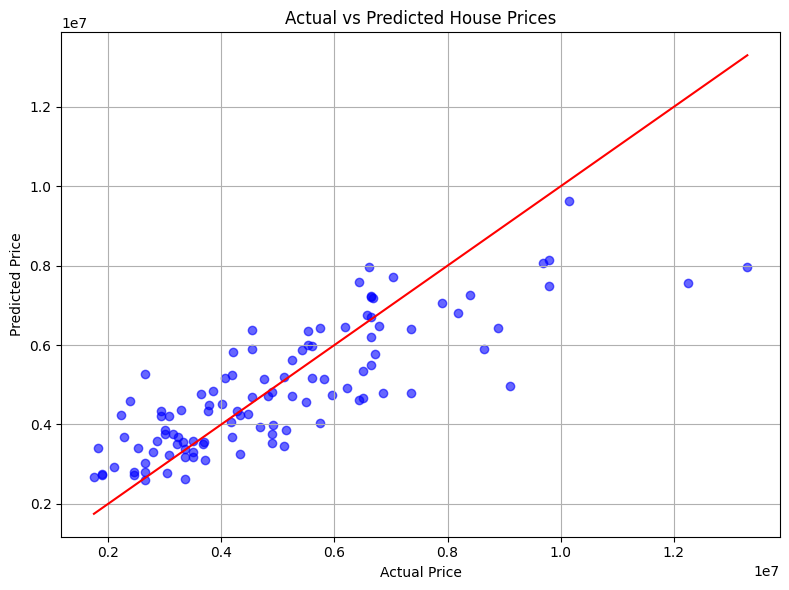

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')  # ideal fit line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.tight_layout()
plt.show()